# DSE 207R FINAL PROJECT
## Fall 2023
### By: Kian Mohseni
### Due Date:  December 12th, 2023

#Read In Data


In [1]:
# Import libraries used in the notebook

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The 4 datasets used in this project include player statistics, player possession, player passing, and player defense at the 2022 FIFA Mens World Cup. The datasets include important features like the number of goals, assists, touches, passes, tackles, and yellow cards for each player at the competition.

I chose to work with these 4 datasets because I am a huge soccer nerd and love to stay informed on the analytics of players' performances. I specifically chose to look at player data at the 2022 FIFA Mens World Cup because of its recency and the fact that it has been my favorite World Cup that I've watched in my lifetime. I am very interested to see how well certain player attributes can help predict their performance in the biggest stage using the sklearn and matplotlib libraries, which makes these datasets perfect for this Final Project.

###Player Statistics

In [2]:
# Read CSV as a Pandas Dataframe

dataset_url1 = "https://raw.githubusercontent.com/kianmessi/FIFA-World-Cup-2022-Player-Data/main/player_stats.csv"
df1 = pd.read_csv(dataset_url1)

In [3]:
df1.head(10)

,player,position,team,age,birth_year,games,games_starts,minutes,minutes_90s,goals,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,1,MF,Australia,32-094,1990,4,4,360,4.0,0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,2,MF,Wales,31-357,1990,3,3,266,3.0,0,...,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,3,MF,Morocco,26-020,1996,5,2,181,2.0,0,...,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,4,DF,Qatar,29-112,1993,3,3,270,3.0,0,...,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,5,FW,Morocco,32-001,1990,4,0,68,0.8,0,...,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52
5,6,FW,Morocco,21-001,2001,3,0,93,1.0,0,...,0.0,0.1,0.1,0.3,0.3,0.09,0.39,0.49,0.09,0.49
6,7,DF,Senegal,26-228,1996,4,4,331,3.7,0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
7,8,FW,Ghana,18-285,2004,1,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
8,9,MF,Qatar,32-051,1990,3,2,196,2.2,0,...,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.02,0.01,0.02
9,10,DF,Saudi Arabia,25-337,1997,3,2,182,2.0,0,...,0.0,0.1,0.1,0.0,0.1,0.03,0.00,0.03,0.03,0.03


In [4]:
df1.shape

(680, 30)

###Player Possession

In [5]:
# Read CSV as a Pandas Dataframe

dataset_url2 = "https://raw.githubusercontent.com/kianmessi/FIFA-World-Cup-2022-Player-Data/main/player_possession.csv"
df2 = pd.read_csv(dataset_url2)

In [6]:
df2.head(10)

,player,position,team,age,birth_year,minutes_90s,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received
0,1,MF,Australia,32-094,1990,4.0,255.0,14.0,62.0,168.0,26.0,0.0,255.0,2.0,3.0,66.7,5.0,4.0,152.0,1.0
1,2,MF,Wales,31-357,1990,3.0,147.0,6.0,32.0,73.0,42.0,5.0,147.0,2.0,8.0,25.0,9.0,4.0,98.0,7.0
2,3,MF,Morocco,26-020,1996,2.0,86.0,5.0,23.0,50.0,13.0,1.0,86.0,0.0,3.0,0.0,0.0,3.0,54.0,0.0
3,4,DF,Qatar,29-112,1993,3.0,193.0,15.0,83.0,95.0,17.0,2.0,193.0,1.0,5.0,20.0,2.0,0.0,138.0,1.0
4,5,FW,Morocco,32-001,1990,0.8,28.0,2.0,2.0,15.0,12.0,5.0,28.0,2.0,3.0,66.7,4.0,3.0,18.0,3.0
5,6,FW,Morocco,21-001,2001,1.0,40.0,2.0,17.0,9.0,16.0,5.0,40.0,1.0,2.0,50.0,9.0,1.0,16.0,3.0
6,7,DF,Senegal,26-228,1996,3.7,210.0,19.0,98.0,98.0,15.0,1.0,210.0,0.0,0.0,NaN,2.0,2.0,138.0,0.0
7,8,FW,Ghana,18-285,2004,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,9,MF,Qatar,32-051,1990,2.2,98.0,1.0,13.0,65.0,20.0,0.0,98.0,1.0,1.0,100.0,1.0,1.0,80.0,2.0
9,10,DF,Saudi Arabia,25-337,1997,2.0,129.0,12.0,58.0,65.0,7.0,2.0,129.0,0.0,0.0,NaN,1.0,0.0,63.0,0.0


In [7]:
df2.shape

(680, 20)

###Player Passing

In [8]:
# Read CSV as a Pandas Dataframe

dataset_url3 = "https://raw.githubusercontent.com/kianmessi/FIFA-World-Cup-2022-Player-Data/main/player_passing.csv"
df3 = pd.read_csv(dataset_url3)

In [9]:
df3.head(10)

,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_pct,passes_total_distance,...,passes_pct_long,assists,xg_assist,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,1,MF,Australia,32-094,1990,4.0,170.0,217.0,78.3,2819.0,...,58.1,0,0.1,0.1,-0.1,1.0,22.0,1.0,0.0,14.0
1,2,MF,Wales,31-357,1990,3.0,88.0,112.0,78.6,1796.0,...,78.3,0,0.0,0.1,0.0,1.0,7.0,1.0,0.0,5.0
2,3,MF,Morocco,26-020,1996,2.0,45.0,58.0,77.6,690.0,...,70.0,1,0.9,0.1,0.1,3.0,3.0,0.0,0.0,0.0
3,4,DF,Qatar,29-112,1993,3.0,122.0,161.0,75.8,2462.0,...,54.1,0,0.0,0.1,0.0,1.0,13.0,1.0,0.0,8.0
4,5,FW,Morocco,32-001,1990,0.8,8.0,15.0,53.3,64.0,...,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,6,FW,Morocco,21-001,2001,1.0,10.0,13.0,76.9,118.0,...,0.0,0,0.3,0.4,-0.3,2.0,0.0,0.0,0.0,2.0
6,7,DF,Senegal,26-228,1996,3.7,139.0,186.0,74.7,2852.0,...,46.8,0,0.1,0.0,-0.1,1.0,10.0,1.0,1.0,8.0
7,8,FW,Ghana,18-285,2004,0.0,1.0,1.0,100.0,48.0,...,100.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,MF,Qatar,32-051,1990,2.2,72.0,91.0,79.1,973.0,...,66.7,0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0
9,10,DF,Saudi Arabia,25-337,1997,2.0,74.0,104.0,71.2,1677.0,...,64.7,0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,11.0


In [10]:
df3.shape

(680, 29)

###Player Defense


In [11]:
# Read CSV as a Pandas Dataframe

dataset_url4 = "https://raw.githubusercontent.com/kianmessi/FIFA-World-Cup-2022-Player-Data/main/player_defense.csv"
df4 = pd.read_csv(dataset_url4)

In [12]:
df4.head(10)

,player,position,team,age,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,...,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors
0,1,MF,Australia,32-094,1990,4.0,9.0,6,4.0,4.0,...,8.0,75.0,2.0,6.0,4.0,2.0,3,12.0,9.0,0.0
1,2,MF,Wales,31-357,1990,3.0,2.0,0,0.0,2.0,...,2.0,0.0,2.0,4.0,1.0,3.0,0,2.0,2.0,1.0
2,3,MF,Morocco,26-020,1996,2.0,3.0,1,1.0,2.0,...,6.0,33.3,4.0,3.0,1.0,2.0,5,8.0,3.0,0.0
3,4,DF,Qatar,29-112,1993,3.0,7.0,3,5.0,2.0,...,4.0,75.0,1.0,3.0,1.0,2.0,1,8.0,5.0,0.0
4,5,FW,Morocco,32-001,1990,0.8,0.0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,2.0,0.0
5,6,FW,Morocco,21-001,2001,1.0,3.0,2,2.0,1.0,...,1.0,100.0,0.0,4.0,1.0,3.0,0,3.0,3.0,0.0
6,7,DF,Senegal,26-228,1996,3.7,2.0,2,2.0,0.0,...,2.0,100.0,0.0,1.0,1.0,0.0,1,3.0,10.0,0.0
7,8,FW,Ghana,18-285,2004,0.0,0.0,0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
8,9,MF,Qatar,32-051,1990,2.2,1.0,1,0.0,0.0,...,2.0,50.0,1.0,0.0,0.0,0.0,1,2.0,0.0,0.0
9,10,DF,Saudi Arabia,25-337,1997,2.0,1.0,0,1.0,0.0,...,1.0,0.0,1.0,2.0,1.0,1.0,4,5.0,10.0,0.0


In [13]:
df4.shape

(680, 22)

Observations: Each dataset has the same number of instances or players (680) but different numbers of features or player attributes in this case.

#Preliminary Exploration

##1. Data Transformation

In [14]:
# Merging the 4 dataframes for player statistics, possession, passing, and defense
df = pd.merge(df1, df2, on = "player", how = "inner")
df = pd.merge(df, df3, on = "player", how = "inner")
df = pd.merge(df, df4, on = "player", how = "inner")


# Remove unnecessary columns
columns_to_remove = ["position_y", "team_y", "age_y", "birth_year_y", "minutes_90s_y", "assists_y", "xg_assist_y"]
df = df.drop(columns_to_remove, axis = 1)


# Remove dupicate columns
df = df.loc[:, ~df.columns.duplicated(keep='first')]


columns_to_change = {"position_x": "position", "team_x": "team", "age_x": "age", "birth_year_x": "birth_year", "minutes_90s_x": "minutes_90s", "assists_x": "assists", "xg_assist_x": "xg_assist"}
df = df.rename(columns = columns_to_change)


# Filter dataframe to only include relevant columns
df_filtered = df[['player', 'position', 'team', 'age', 'birth_year', 'games',
       'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
       'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'goals_per90', 'assists_per90', 'goals_assists_per90',
       'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'touches',
       'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_pen_area',
       'dribbles_completed', 'dribbles',
       'miscontrols', 'dispossessed', 'passes_received', 'passes_completed', 'passes',
       'passes_pct', 'passes_total_distance', 'passes_progressive_distance','passes_short', 'passes_medium', 'passes_long',
       'tackles', 'tackles_won', 'tackles_def_3rd',
       'tackles_mid_3rd', 'tackles_att_3rd', 'dribbled_past', 'blocks', 'blocked_shots',
       'blocked_passes', 'interceptions','clearances', 'errors']]


print(df_filtered.columns)

Index(['player', 'position', 'team', 'age', 'birth_year', 'games',
       'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
       'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'goals_per90', 'assists_per90', 'goals_assists_per90',
       'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'touches',
       'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_pen_area', 'dribbles_completed',
       'dribbles', 'miscontrols', 'dispossessed', 'passes_received',
       'passes_completed', 'passes', 'passes_pct', 'passes_total_distance',
       'passes_progressive_distance', 'passes_short', 'passes_medium',
       'passes_long', 'tackles', 'tackles_won', 'tackles_def_3rd',
       'tackles_mid_3rd', 'tackles_att_3rd', 'dribbled_past', 'blocks',
       'blocked_shots', 'blocked_passes', 'interceptions', 'clearances',
       'errors'],
      dtype='object')


<ipython-input-14-5b603a576ecd>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'minutes_90s_x', 'age_x', 'birth_year_x', 'position_x', 'team_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df4, on = "player", how = "inner")


In [15]:
df_filtered.head(10)

,player,position,team,age,birth_year,games,games_starts,minutes,minutes_90s,goals,...,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,clearances,errors
0,1,MF,Australia,32-094,1990,4,4,360,4.0,0,...,4.0,4.0,1.0,2.0,6.0,4.0,2.0,3,9.0,0.0
1,2,MF,Wales,31-357,1990,3,3,266,3.0,0,...,0.0,2.0,0.0,2.0,4.0,1.0,3.0,0,2.0,1.0
2,3,MF,Morocco,26-020,1996,5,2,181,2.0,0,...,1.0,2.0,0.0,4.0,3.0,1.0,2.0,5,3.0,0.0
3,4,DF,Qatar,29-112,1993,3,3,270,3.0,0,...,5.0,2.0,0.0,1.0,3.0,1.0,2.0,1,5.0,0.0
4,5,FW,Morocco,32-001,1990,4,0,68,0.8,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2.0,0.0
5,6,FW,Morocco,21-001,2001,3,0,93,1.0,0,...,2.0,1.0,0.0,0.0,4.0,1.0,3.0,0,3.0,0.0
6,7,DF,Senegal,26-228,1996,4,4,331,3.7,0,...,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1,10.0,0.0
7,8,FW,Ghana,18-285,2004,1,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8,9,MF,Qatar,32-051,1990,3,2,196,2.2,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0
9,10,DF,Saudi Arabia,25-337,1997,3,2,182,2.0,0,...,1.0,0.0,0.0,1.0,2.0,1.0,1.0,4,10.0,0.0


In [16]:
df_filtered.shape

(680, 53)

Observations: Through merging the 4 datasets and removing both irrelevant and duplicate columns, we now have a combined filtered dataframe with 53 features.

## 2. Handling Missing Values

In this section, we check the dataset for any columns with null values as this helps in removing the noisy/unuseful data.

In [17]:
# Determine the number of missing values per feature
print("NAs for each feature:")
df_filtered.isna().sum()

NAs for each feature:


player                         0
position                       0
team                           0
age                            0
birth_year                     0
games                          0
games_starts                   0
minutes                        0
minutes_90s                    0
goals                          0
assists                        0
goals_pens                     0
pens_made                      0
pens_att                       0
cards_yellow                   0
cards_red                      0
goals_per90                    0
assists_per90                  0
goals_assists_per90            0
goals_pens_per90               0
goals_assists_pens_per90       0
xg                             3
touches                        3
touches_def_pen_area           3
touches_def_3rd                3
touches_mid_3rd                3
touches_att_3rd                3
touches_att_pen_area           3
dribbles_completed             3
dribbles                       3
miscontrol

In [18]:
# Make sure that none of the features contain missing values
list(df_filtered.columns[df_filtered.isna().sum() == 0])

['player',
 'position',
 'team',
 'age',
 'birth_year',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'tackles_won',
 'interceptions']

In [19]:
# Drop all the missing values in every column
df_filtered.dropna(inplace = True)

<ipython-input-19-e7361114f07d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace = True)


In [20]:
# Double check that there are no columns with missing values left
print(df_filtered.isna().sum())

player                         0
position                       0
team                           0
age                            0
birth_year                     0
games                          0
games_starts                   0
minutes                        0
minutes_90s                    0
goals                          0
assists                        0
goals_pens                     0
pens_made                      0
pens_att                       0
cards_yellow                   0
cards_red                      0
goals_per90                    0
assists_per90                  0
goals_assists_per90            0
goals_pens_per90               0
goals_assists_pens_per90       0
xg                             0
touches                        0
touches_def_pen_area           0
touches_def_3rd                0
touches_mid_3rd                0
touches_att_3rd                0
touches_att_pen_area           0
dribbles_completed             0
dribbles                       0
miscontrol

In [21]:
df_filtered.head(10)

,player,position,team,age,birth_year,games,games_starts,minutes,minutes_90s,goals,...,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,clearances,errors
0,1,MF,Australia,32-094,1990,4,4,360,4.0,0,...,4.0,4.0,1.0,2.0,6.0,4.0,2.0,3,9.0,0.0
1,2,MF,Wales,31-357,1990,3,3,266,3.0,0,...,0.0,2.0,0.0,2.0,4.0,1.0,3.0,0,2.0,1.0
2,3,MF,Morocco,26-020,1996,5,2,181,2.0,0,...,1.0,2.0,0.0,4.0,3.0,1.0,2.0,5,3.0,0.0
3,4,DF,Qatar,29-112,1993,3,3,270,3.0,0,...,5.0,2.0,0.0,1.0,3.0,1.0,2.0,1,5.0,0.0
4,5,FW,Morocco,32-001,1990,4,0,68,0.8,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2.0,0.0
5,6,FW,Morocco,21-001,2001,3,0,93,1.0,0,...,2.0,1.0,0.0,0.0,4.0,1.0,3.0,0,3.0,0.0
6,7,DF,Senegal,26-228,1996,4,4,331,3.7,0,...,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1,10.0,0.0
7,8,FW,Ghana,18-285,2004,1,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8,9,MF,Qatar,32-051,1990,3,2,196,2.2,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0
9,10,DF,Saudi Arabia,25-337,1997,3,2,182,2.0,0,...,1.0,0.0,0.0,1.0,2.0,1.0,1.0,4,10.0,0.0


In [22]:
df_filtered.shape

(674, 53)

Observations: By removing players with null values for any of the columns, we reduced the number of players in the filtered dataframe to 674.

##3. Data Summarization/Exploratory Analysis

In this section, we want to better understand how the data is distributed and what variables to focus on for our analysis.

1. Describe: To see dataframe level statistics of every numerical field. We see that the counts are the same for all fields at 674 players, while the minimum and maximum minutes played are 1 and 690, respectively. The mean number of minutes played between all 674 players recorded was about 193. Meanwhile, the highest number of goals and assists recorded by any player at the tournament were 8 and 3, respectively.
2. Histogram: To see the distribution of birth year, games, minutes, goals, assists, touches, dribbles, passes, and tackles among all the players at the competition. The distribution of birth years appears to be slightly skewed to the left with about half the players being born after 1995. This means half the players were 27 years old or younger at the time of the competition. The most common birth years at the tournament were 1996 and 1997. The youngest player at the World Cup was born in 2004 (18 years old) and the oldest player was born in 1983 (39 years old). All the other distributions are skewed to the right with means greater than the medians.
3. Info: To see what type of data is in each field. We see that it is a mix of 51 numerical and 2 object fields.

In [23]:
df_filtered.describe()

,player,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,...,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,clearances,errors
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,340.083086,1994.919881,2.946588,2.086053,192.602374,2.139911,0.252226,0.178042,0.227003,0.025223,...,1.554896,1.172107,0.339763,1.093472,2.124629,0.541543,1.583086,1.581602,3.563798,0.062315
std,196.568343,4.159465,1.520576,1.752523,147.551101,1.639871,0.701433,0.488554,0.602457,0.213132,...,2.231235,1.575271,0.718255,1.478479,2.369171,1.050958,1.931150,2.087254,5.028560,0.270882
min,1.000000,1983.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.250000,1992.000000,2.000000,1.000000,69.250000,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,339.500000,1995.000000,3.000000,2.000000,175.000000,1.900000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,509.750000,1998.000000,4.000000,3.000000,270.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,2.000000,3.000000,1.000000,2.000000,2.000000,5.000000,0.000000
max,680.000000,2004.000000,7.000000,7.000000,690.000000,7.700000,8.000000,3.000000,6.000000,4.000000,...,15.000000,11.000000,5.000000,11.000000,13.000000,7.000000,12.000000,14.000000,37.000000,3.000000


In [24]:
# Replace values in "Position" column with numerical values that can be used for classification later on
df_filtered["position"] = df_filtered["position"].replace("GK", 1)
df_filtered["position"] = df_filtered["position"].replace("DF", 2)
df_filtered["position"] = df_filtered["position"].replace("MF", 3)
df_filtered["position"] = df_filtered["position"].replace("FW", 4)

<ipython-input-24-54227c8e9adc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["position"] = df_filtered["position"].replace("GK", 1)
<ipython-input-24-54227c8e9adc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["position"] = df_filtered["position"].replace("DF", 2)
<ipython-input-24-54227c8e9adc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

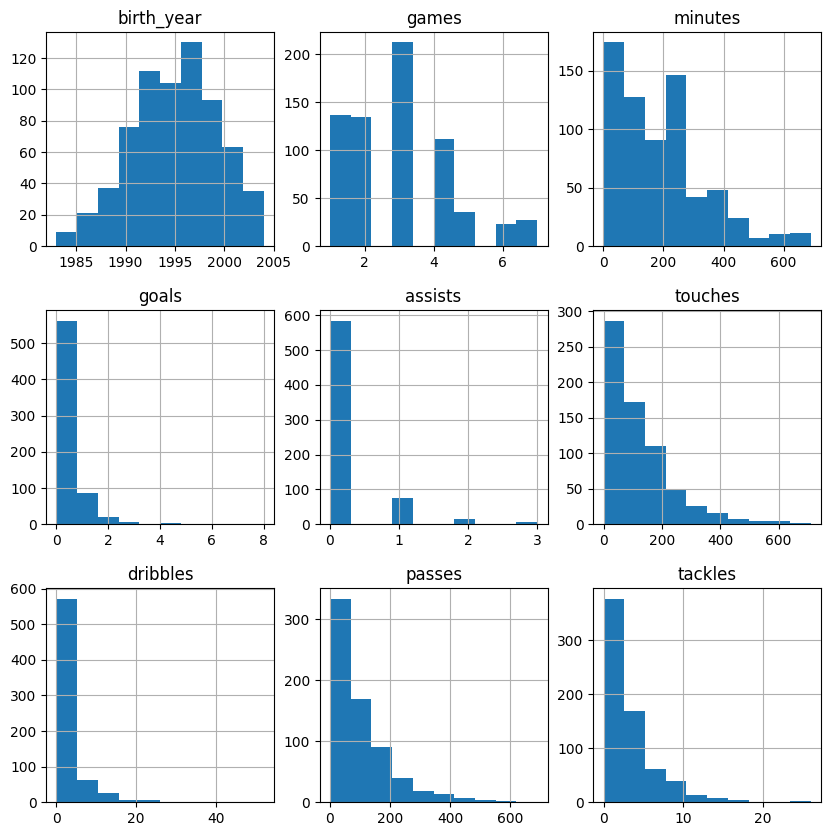

In [25]:
# Use histogram subplot to observe the distributions of several variables
fig, axes = plt.subplots(3, 3, figsize = (10, 10))

df['birth_year'].hist(grid = True, ax = axes[0,0])
df['games'].hist(grid = True, ax = axes[0,1])
df['minutes'].hist(grid = True, ax = axes[0,2])
df['goals'].hist(grid = True, ax = axes[1,0])
df['assists'].hist(grid = True, ax = axes[1,1])
df['touches'].hist(grid = True, ax = axes[1,2])
df['dribbles'].hist(grid = True, ax = axes[2,0])
df['passes'].hist(grid = True, ax = axes[2,1])
df['tackles'].hist(grid = True, ax = axes[2,2])


axes[0,0].set_title('birth_year')
axes[0,1].set_title('games')
axes[0,2].set_title('minutes')
axes[1,0].set_title('goals')
axes[1,1].set_title('assists')
axes[1,2].set_title('touches')
axes[2,0].set_title('dribbles')
axes[2,1].set_title('passes')
axes[2,2].set_title('tackles')

plt.subplots_adjust(hspace = 0.3)

plt.show()

In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 679
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player                       674 non-null    int64  
 1   position                     674 non-null    int64  
 2   team                         674 non-null    object 
 3   age                          674 non-null    object 
 4   birth_year                   674 non-null    int64  
 5   games                        674 non-null    int64  
 6   games_starts                 674 non-null    int64  
 7   minutes                      674 non-null    int64  
 8   minutes_90s                  674 non-null    float64
 9   goals                        674 non-null    int64  
 10  assists                      674 non-null    int64  
 11  goals_pens                   674 non-null    int64  
 12  pens_made                    674 non-null    int64  
 13  pens_att            

#Research Questions

1. Can we classify a player's position based on what areas of the field they take the most touches in?
2. We want to analyze how features like dribbles completed, passes completed, tackles, blocks, touches, assists, and yellow cards are correlated in determining a players xG or expected goals. It will help us to see how accurate the xG attribute in our data is in predicting the actual number of goals scored by each player at the tournament.
3. How do the number of passes completed vary by each team? Is number of passes completed a good indicator of team performance at the World Cup?

# Analysis/Present Your Findings


## 1.

In [27]:
# We want to create a dataframe of features X with only the relevant "touches" variables.
# We want to remove the target variable label "position" and store it another dataframe y.

selected_columns = ["touches_def_pen_area", "touches_def_3rd", "touches_mid_3rd", "touches_att_3rd", "touches_att_pen_area"]
X = df_filtered[selected_columns]

y = df_filtered["position"]

In [28]:
# Import and Create a Decision Tree Classifier model called clf with maximum number of leaf nodes equal to number of input features i.e. len(X.columns), Random state = 0
clf_1 = tree.DecisionTreeClassifier(max_leaf_nodes = len(X.columns), random_state = 0)

In [29]:
# Split data into training(80%) and test(20%) set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [30]:
# Fit the classifier on the training data (X_train, y_train)
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [31]:
# Generate a list predictions_train containing all the position predictions for the train set
predictions_train = clf_1.predict(X_train)

In [32]:
# Generate a list predictions_test containing all the position predictions for the test set
predictions_test = clf_1.predict(X_test)

In [33]:
# Find the accuracy of train set for the model using above predictions
accuracy_score(y_true = y_train, y_pred = predictions_train)

0.6307977736549165

In [34]:
# Find the accuracy of test set for the model using above predictions
accuracy_score(y_true = y_test, y_pred = predictions_test)

0.6592592592592592

Test accuracy is slightly higher than train accuracy for the Decision Tree Classifier (66% compared to 63%), which is unusual. This case demonstrates the opposite of overfitting and could be considered underfitting since the testing data is easier to predict than the training data. However, since the difference is relatively small, I believe my approach is still valid.  

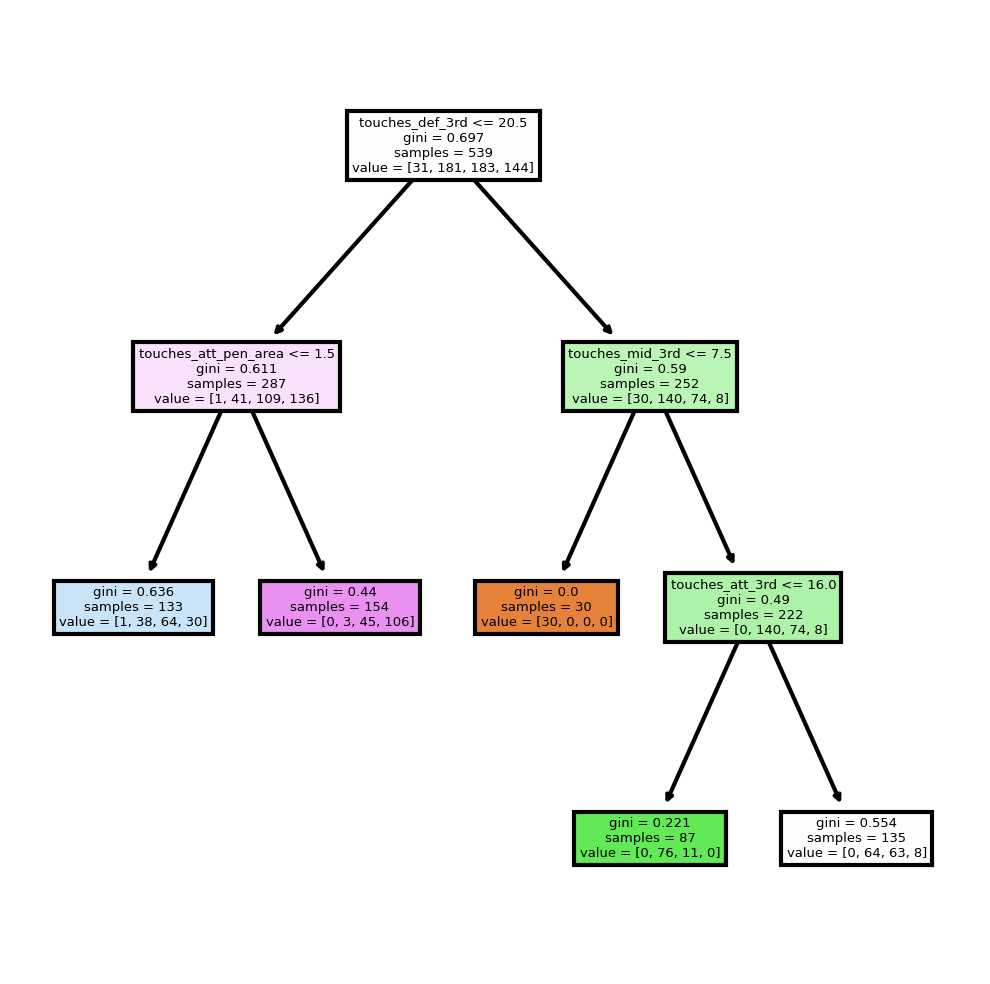

In [35]:
# Plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_1,
               feature_names = X.columns,
               filled = True);

The Decision Tree shows us the dataset is first split by the root node based on how many touches a player takes in the defensive third of the field and it is an effecitve splittign node because the next 2 internal nodes have high Gini indeces or purity scores. It makes sense that this is a good indicator because attacking players like Forwards almost never take any tocuhes in their own defensive third of the field. Another good indicator is how many touches players take in the attacking penalty area because Defenders and Goalkeepers would very rarely take touches in this area of the field. The worst indicator based on resulting Gini indeces is touches in the middle third of the field because that is an area in which players from all positions, aside for Goalkeepers, take a relatively equal amount of touches in depending on if their team is attacking or defending more.

In [36]:
# import and create a Random Forest Classfier using the same training and test data
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier(random_state = 0)
clf_2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
# Find the predictions on the test set using RandomForestClassifier mode
predictions = clf_2.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

0.6814814814814815

The accuracy score of the Random Forest Classifier is higher than that of the Decision Tree Classifier (68% compared to 66%) which makes sense because it combines multiple trees and reduces overfitting, thus making it more robust and a better precictor.

In [38]:
# Drop the columns with object values in the new X1 dataframe
X1 = df_filtered.drop(columns = ["position", "team", "age"])
y1 = df_filtered["position"]

In [39]:
# Split data into training(80%) and test(20%) set using train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state = 100)

In [40]:
# Create a new Random Forest Classfier using the same training and test data
clf_3 = RandomForestClassifier(random_state = 0)
clf_3.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=0)

In [41]:
# Find the predictions on the test set using RandomForestClassifier model
predictions_1 = clf_3.predict(X_test_1)

accuracy_score(y_true = y_test_1, y_pred = predictions_1)

0.7185185185185186

The accuracy of this classifier (72%) is the highest we have seen because we are now using more features than just touches to predict the players' positions.

In [42]:
# calculate feature importance using our new RandomForestClassifier model
clf_3.feature_importances_

array([0.02301943, 0.01929752, 0.01714075, 0.0074401 , 0.0272761 ,
       0.02132977, 0.00308724, 0.00213141, 0.00256165, 0.00034865,
       0.00064173, 0.00438197, 0.00020377, 0.00584169, 0.00331549,
       0.00602223, 0.00496715, 0.00864997, 0.03136281, 0.01650246,
       0.06109809, 0.07988499, 0.05650915, 0.04333554, 0.03381976,
       0.01254598, 0.02109732, 0.0202489 , 0.02787706, 0.02349585,
       0.02442986, 0.0215683 , 0.03339526, 0.03395302, 0.0545487 ,
       0.01824558, 0.03070806, 0.03210084, 0.01643617, 0.01177293,
       0.01351794, 0.01240894, 0.00471355, 0.01198762, 0.01572338,
       0.00591415, 0.01243959, 0.01473742, 0.04500614, 0.000958  ])

Text(0.5, 1.0, 'Feature Importance')

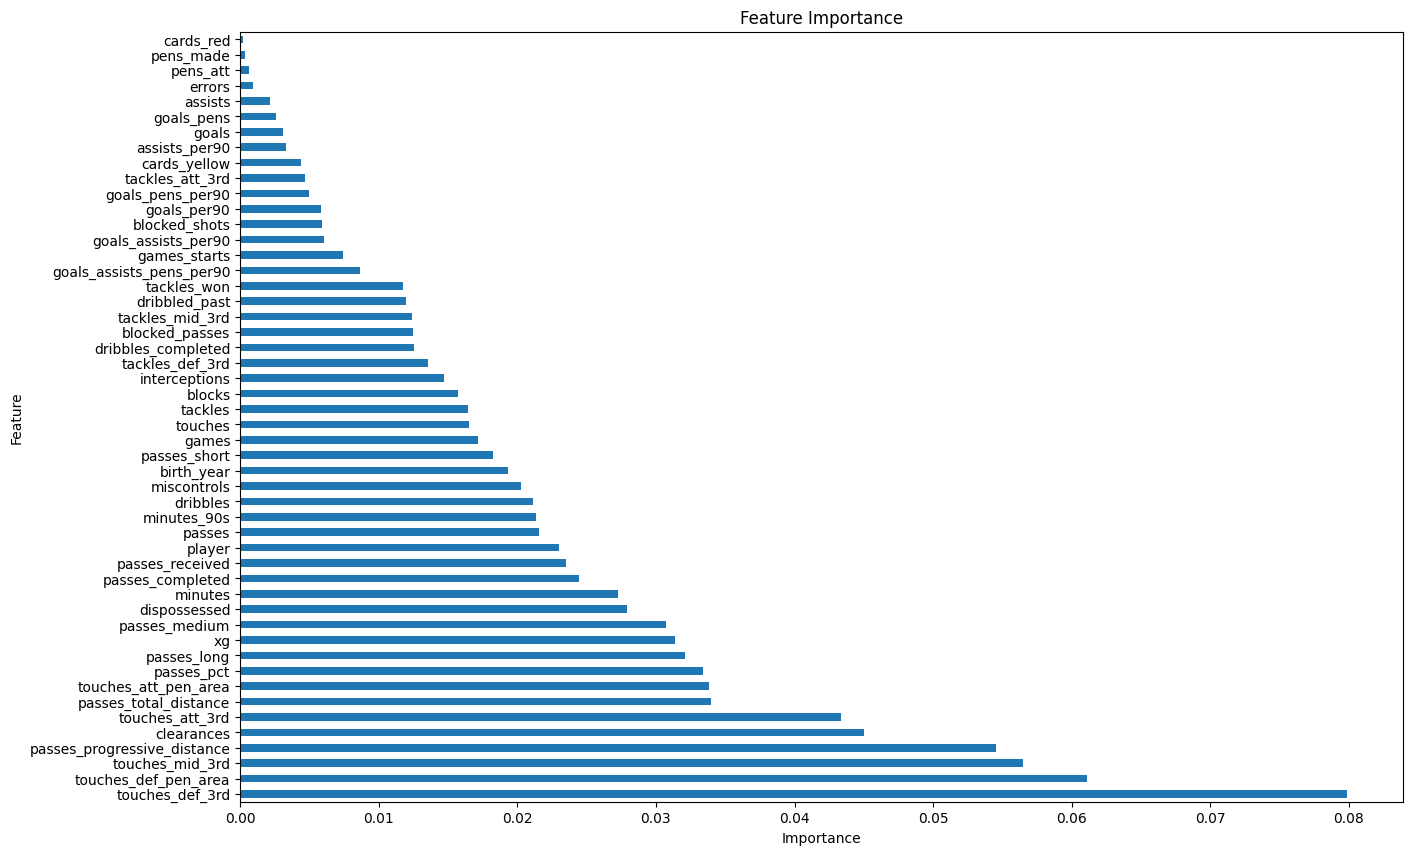

In [43]:
# Plot a horizontal bar graph showing the most important features used to classify a player's position
feat_importances = pd.Series(clf_3.feature_importances_, index = X1.columns)
feat_importances_sorted = feat_importances.sort_values(ascending = False)
feat_importances_sorted.plot(kind = 'barh', figsize = (15,10));

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

From the bar graph above, we can see that the 5 most important features include touches in the defensive third, touches in the defensive penalty area, touches in the middle third, forward passes, and clearances. These results confirm my hypothesis that touches are the best indicator of a player's position. However it also make sense that forward passes and clearances are some of the most important features because Defenders and Midfielders will make more passes up the field than Forwards and Defenders will make more clearances than any other position.

## 2.

In [44]:
# Filter dataframe to only include the desired variables
df_filtered_filtered = df_filtered[['dribbles_completed', 'passes_completed', 'tackles', 'blocks', 'touches', 'assists', 'cards_yellow', 'xg']]

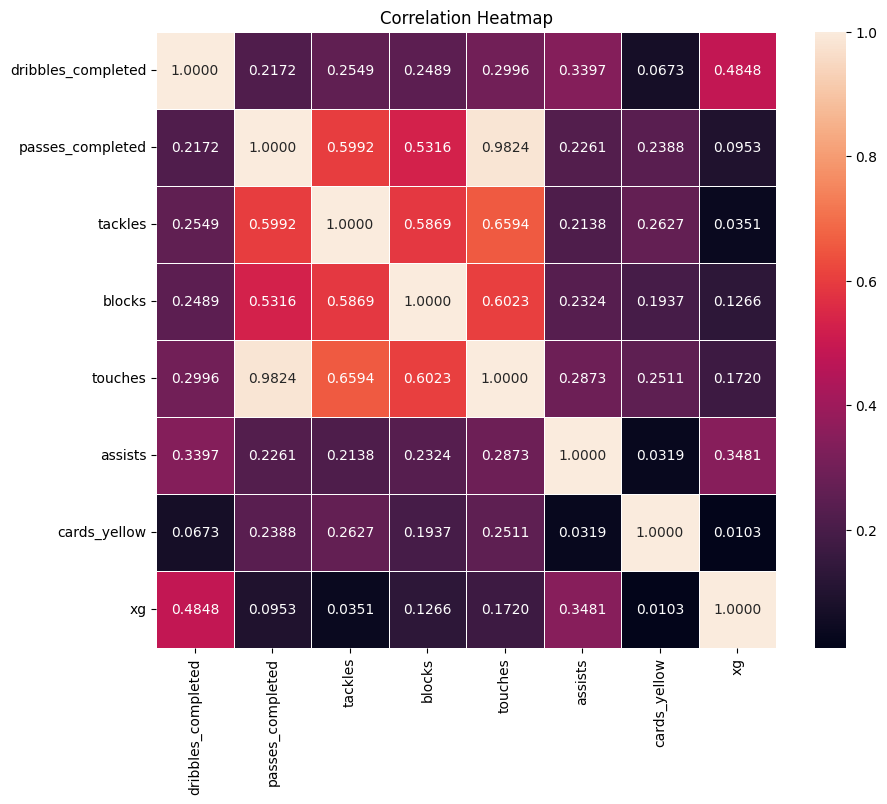

In [45]:
# Plot heatmap showing correlation between each combination of variables
plt.figure(figsize = (10,8))
plt.title('Correlation Heatmap')
sns.heatmap(df_filtered_filtered.corr(), annot=True, fmt=".4f",  linewidths=0.5)
plt.show()

From the heatmap above, we can see that touches and passes completed are strongly correlated (correlation = 0.9824), which makes sense because in order to complete a pass, a player needs to take a touch. Other features that are closely correlated include blocks, passes completed, and tackles because these are all attributes that are seen most commonly in Defenders. Dribbles completed and expected goals are also relatively closely correlated (correlation = 0.4848) because attacking players like Forwards who dribble more up the field are also more likely to score goals. Conversely, it makes sense that tackles, yellow cards, and passes completed have incredibly low correlation (all under 0.1) with expected goals because those are all attributes associated with Defenders who rarely score goals.

In [46]:
# Isolate goals and xG columns
goals = df_filtered['goals']
xG = df_filtered['xg']

In [47]:
# Determine the slope and intercept of the line of best fit for the scatterplot between xG and goals
coefficients = np.polyfit(xG, goals, 1)
slope, intercept = coefficients
print(f"The slope and intercept are {slope} and {intercept}, respectively.")

The slope and intercept are 1.0767735873232815 and -0.024796053474565396, respectively.


A scatterplot was used for Objective 2 as a different approach to represent the overall trend/correlation between xG and Goals for all players at the tournament. Based on the direction and slope of the imaginary trendline, we can determine the type (positive or negative) and strength of the relationship between the 2 features, respectively. This slope of approximately 1 is a good indicator that the expected goals feature used in the dataset does a good job of predicting the number of goals scored by each player at the tournament. The intercept of the best fit line of the scatterplot is also close to 0, which is another positive indicator of the accuracy of the expected goals feature.

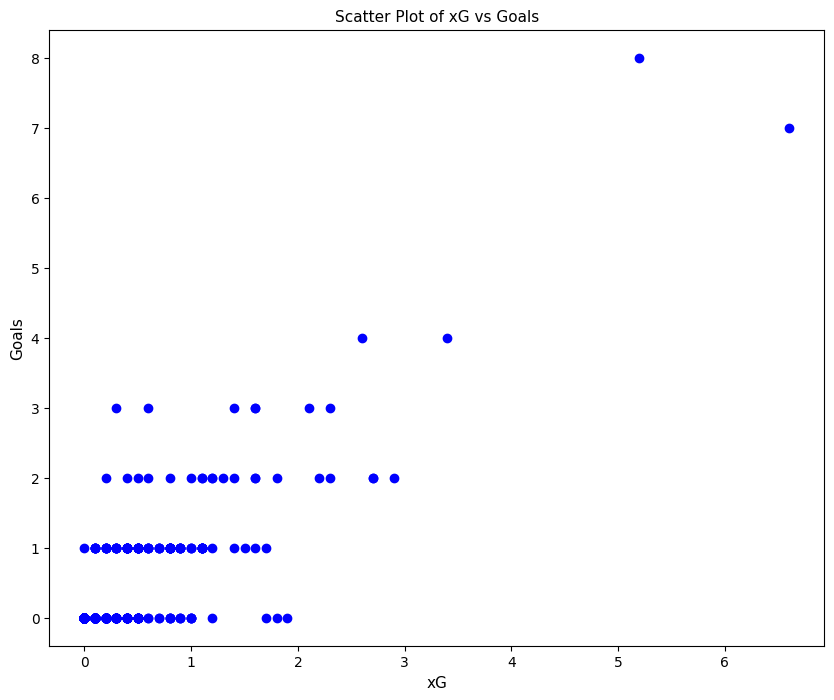

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(xG, goals, color = 'blue', alpha = 1)

plt.xlabel('xG', fontsize = 11)
plt.ylabel('Goals', fontsize = 11)
plt.title('Scatter Plot of xG vs Goals', fontsize = 11)

plt.show()

In [49]:
# Determine correlation between expected goals and actual goals among all players
correlation = goals.corr(xG)
print("Correlation between xG and Goals: ", correlation)

Correlation between xG and Goals:  0.8253215694205727


From the scatterplot and correlation value above, we can see that there aren't outliers in the dataset. Secondly, xG and Goals are directly related with a strong correlation close to 1.

## 3.

In [50]:
# Compute total number of passes by team
number_passes_by_team = df_filtered.groupby('team')['passes'].sum()
number_passes_by_team = number_passes_by_team.sort_values()

A bar plot was used for Objective 3 to categorize total number of passes by team. The bar plot provides a clear side-by-side comparison between each region and allows us to make educated inferences about the correlation between number of passes and the tournament performance of a team.

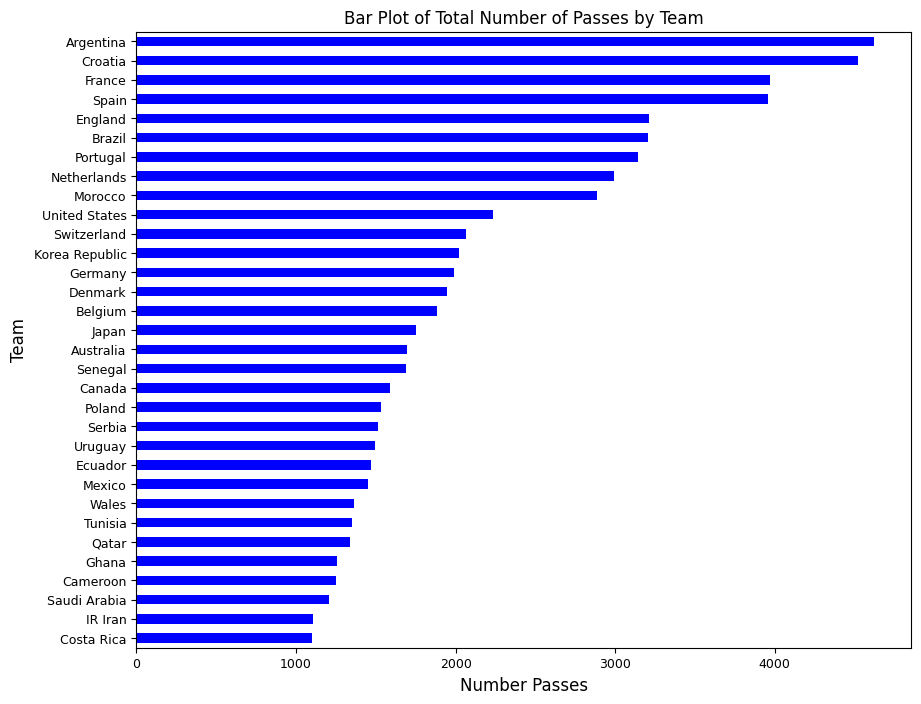

In [51]:
# Plot horizontal bar graph
plt.figure(figsize=(10,8))
number_passes_by_team.plot(kind = 'barh', color = 'blue', fontsize = 9)

plt.ylabel('Team', fontsize = 12)
plt.xlabel('Number Passes', fontsize = 12)
plt.title('Bar Plot of Total Number of Passes by Team', fontsize = 12)

plt.show()

From the bar plot above, we can see that 3 of the top 4 passing teams were semifinalists in Argentina, Croatia, and France. This proves that there must be a strong direct correlation between a team's number of passes and their success (how far they go) at the World Cup. It's also interesting to see that all 3 teams with the lowest number of passes (Saudi Arabia, IR Iran, and Costa Rica) got knocked out of the tournament in the Group Stages (first round). This further demonstrated the importance of passing to a team's success in the competition.

#Conclusion

In conclusion, all 3 of our research questions (hypotheses) have been confirmed by the analysis conducted. These include our ability to classify a player's position based on which areas of the field he takes the most touches in, proving the accuracy of the expected goals feature in predicting the actual number of goals scored by each player, and demonstrating that teams that pass more are more likely to succeed in a competition.


However, it is important to note that there are clearly many limitations in our analysis. For example, this analysis is only representative of the FIFA Men's World Cup 2022, and may not generalize the trends seen in other football tournaments or women's competitions. There are many other confoundning variables that need to be considered like weather conditions, referee decisions, or issues in players personal lives that will all complicate our models/analysis. The context or importance of each match (Group Stage vs Knockout Stage) and team dynamics/strategies is also something that wasn't considered in this analysis, but can play a major role in the results. The most obvious concern is that we are assuming that the source of our player data is reliable, without any errors. Without all these considerations, we cannot be certain that the analysis we performed and conclusions we came to are 100% valid.